<a href="https://colab.research.google.com/github/DeboraOliver/StockMarket_Analysis/blob/main/Python_para_finan%C3%A7as_visualiza%C3%A7%C3%A3o_de_dados_financeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - visualização de dados financeiros

In [ ]:
!pip install -q yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

## Base de dados com uma ação

In [ ]:
#gol_df = data.DataReader(name = 'GOLL4.SA', data_source='yahoo', start='2015-01-01')
gol_df = yf.download("TRQ.TO", start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
gol_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,36.799999,38.900002,36.400002,38.500000,38.500000,67700
2015-01-05,39.000000,39.000000,37.000000,37.599998,37.599998,67960
2015-01-06,37.500000,37.500000,36.299999,36.799999,36.799999,50030
2015-01-07,37.500000,37.500000,35.700001,36.000000,36.000000,51720
2015-01-08,36.000000,36.099998,35.200001,35.700001,35.700001,42370
...,...,...,...,...,...,...
2022-02-15,25.830000,27.070000,25.790001,26.910000,26.910000,149400
2022-02-16,26.940001,27.400000,26.629999,26.639999,26.639999,140100
2022-02-17,26.650000,26.750000,25.959999,26.129999,26.129999,109200


In [ ]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1792 entries, 2015-01-02 to 2022-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1792 non-null   float64
 1   High       1792 non-null   float64
 2   Low        1792 non-null   float64
 3   Close      1792 non-null   float64
 4   Adj Close  1792 non-null   float64
 5   Volume     1792 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 98.0 KB


In [ ]:
gol_df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,36.799999,38.900002,36.400002,38.500000,38.500000,67700
2015-01-05,39.000000,39.000000,37.000000,37.599998,37.599998,67960
2015-01-06,37.500000,37.500000,36.299999,36.799999,36.799999,50030


In [ ]:
gol_df.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-17,26.650000,26.75,25.959999,26.129999,26.129999,109200
2022-02-18,26.170000,26.40,25.900000,26.030001,26.030001,162200
2022-02-22,25.780001,26.23,25.690001,25.910000,25.910000,112454


In [ ]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1.792000e+03
mean,27.944157,28.439169,27.402305,27.895039,27.895039,1.476279e+05
std,13.301836,13.436117,13.143052,13.280627,13.280627,2.846454e+05
min,4.500000,5.200000,4.300000,4.600000,4.600000,1.047000e+04
25%,16.737500,17.062500,16.342500,16.777501,16.777501,6.047000e+04
50%,29.900000,30.300000,28.400000,29.200001,29.200001,1.002400e+05
75%,38.900002,39.599998,38.400002,39.000000,39.000000,1.602175e+05
max,57.900002,58.000000,54.500000,55.000000,55.000000,7.761540e+06


In [ ]:
gol_df[gol_df['Close'] >= 43.79]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-06,42.400002,44.900002,42.299999,44.700001,44.700001,103870
2015-04-07,45.200001,45.900002,43.799999,44.200001,44.200001,95220
2015-04-08,47.000000,47.000000,44.200001,45.000000,45.000000,81770
2015-04-09,45.000000,47.099998,44.900002,46.900002,46.900002,154490
2015-04-10,47.000000,47.799999,46.299999,47.599998,47.599998,96620
...,...,...,...,...,...,...
2018-01-03,44.500000,44.900002,44.099998,44.400002,44.400002,48770
2018-01-04,44.400002,44.700001,44.099998,44.400002,44.400002,47680
2018-01-11,43.200001,44.299999,43.099998,44.000000,44.000000,43180


In [ ]:
gol_df[(gol_df['Close'] >= 1.15) & (gol_df['Close'] <= 1.16)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
gol_df.to_csv('gol.csv')

In [ ]:
gol_df2 = pd.read_csv('/content/gol.csv')
gol_df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,36.799999,38.900002,36.400002,38.500000,38.500000,67700
1,2015-01-05,39.000000,39.000000,37.000000,37.599998,37.599998,67960
2,2015-01-06,37.500000,37.500000,36.299999,36.799999,36.799999,50030
3,2015-01-07,37.500000,37.500000,35.700001,36.000000,36.000000,51720
4,2015-01-08,36.000000,36.099998,35.200001,35.700001,35.700001,42370
...,...,...,...,...,...,...,...
1787,2022-02-15,25.830000,27.070000,25.790001,26.910000,26.910000,149400
1788,2022-02-16,26.940001,27.400000,26.629999,26.639999,26.639999,140100
1789,2022-02-17,26.650000,26.750000,25.959999,26.129999,26.129999,109200
1790,2022-02-18,26.170000,26.400000,25.900000,26.030001,26.030001,162200


## Base de dados com mais ações

- BOVA11: https://www.sunoresearch.com.br/artigos/bova11/

In [ ]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2022-02-16,19.709999,15.12,31.299999,6.820000,30.450001,110.769997
2022-02-17,19.000000,14.68,30.650000,6.630000,32.220001,109.099998
2022-02-18,18.930000,14.08,29.809999,6.360000,31.820000,108.510002


In [ ]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

In [ ]:
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


In [ ]:
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [ ]:
acoes_df.shape

(1775, 6)

In [ ]:
acoes_df.dropna(inplace=True)

In [ ]:
acoes_df.shape

(1775, 6)

In [ ]:
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [ ]:
acoes_df.to_csv('acoes.csv')

In [ ]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1770,2022-02-16,19.709999,15.12,31.299999,6.820000,30.450001,110.769997
1771,2022-02-17,19.000000,14.68,30.650000,6.630000,32.220001,109.099998
1772,2022-02-18,18.930000,14.08,29.809999,6.360000,31.820000,108.510002
1773,2022-02-21,18.190001,13.27,29.650000,6.060000,31.549999,107.449997


In [ ]:
acoes_df.columns[1:]

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [ ]:
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,15.798992,30.350504,15.209015,7.074152,16.508146,78.960897
std,9.701030,15.631530,11.979955,8.009863,8.921014,23.696859
min,1.160000,6.106568,4.942307,0.030585,7.156402,36.450001
25%,7.740000,17.485000,6.557692,0.352284,9.981036,57.615000
50%,14.720000,23.820000,9.030769,3.855312,11.468210,77.489998
75%,22.010000,44.390001,21.472500,11.431250,23.244999,99.415001
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


## Visualização

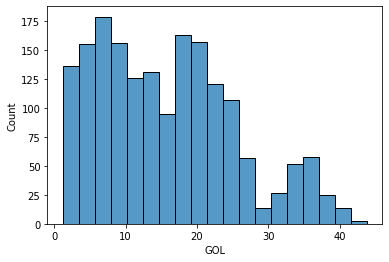

In [ ]:
sns.histplot(acoes_df['GOL']);

In [ ]:
len(acoes_df.columns)

7

In [ ]:
np.arange(1, len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6])

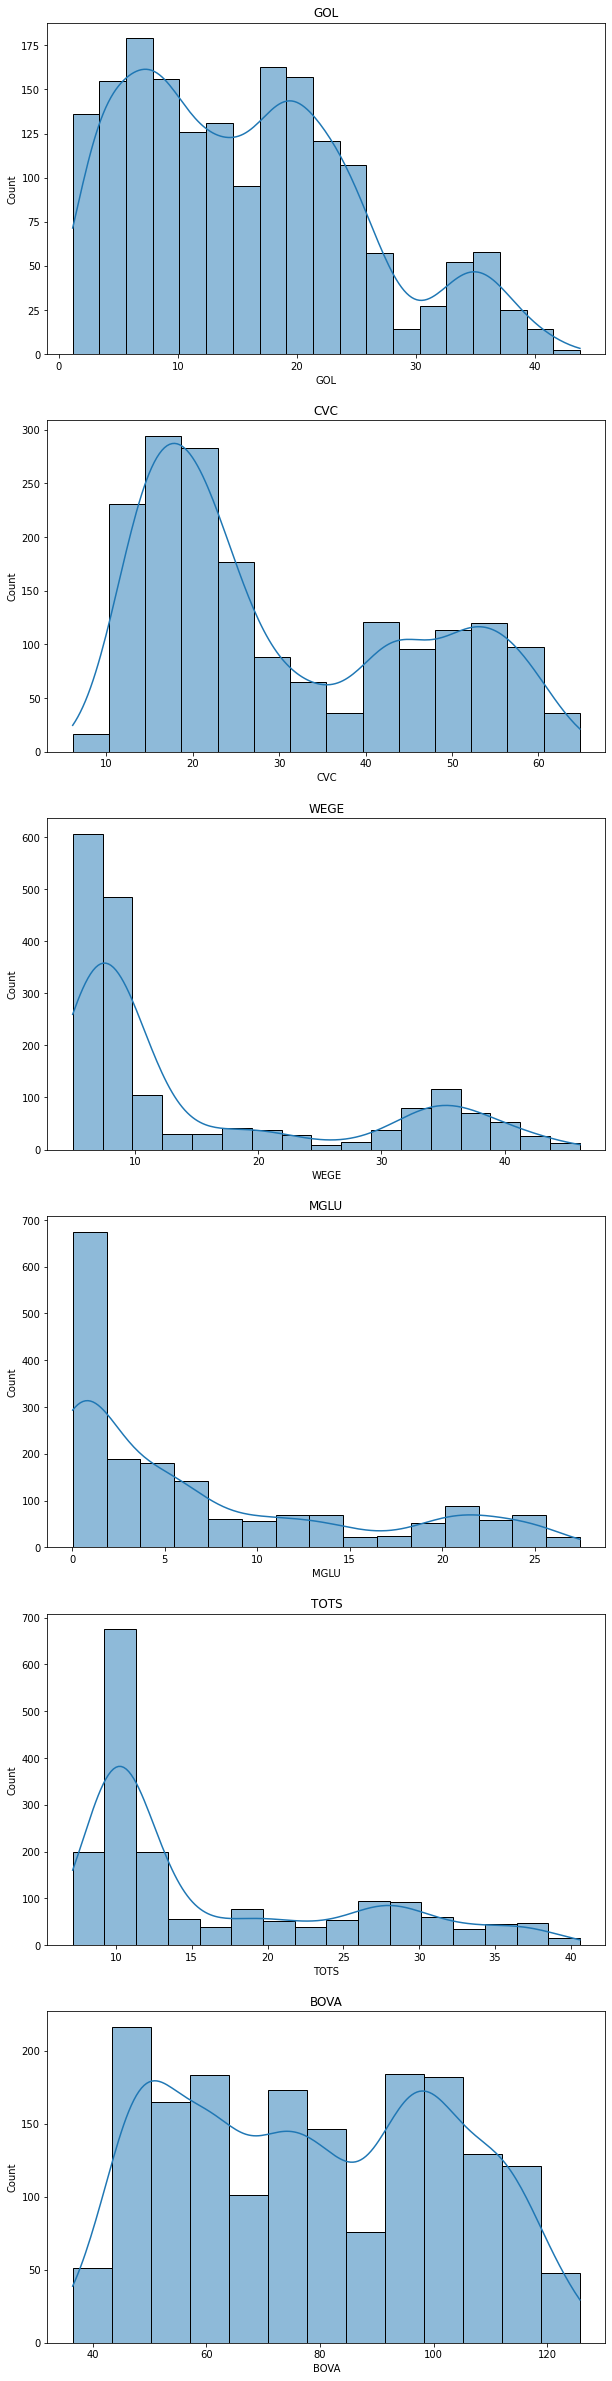

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

In [ ]:
acoes_df['GOL'].describe()

count    1775.000000
mean       15.798992
std         9.701030
min         1.160000
25%         7.740000
50%        14.720000
75%        22.010000
max        43.790001
Name: GOL, dtype: float64

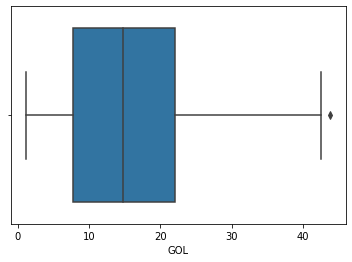

In [ ]:
sns.boxplot(x = acoes_df['GOL']);

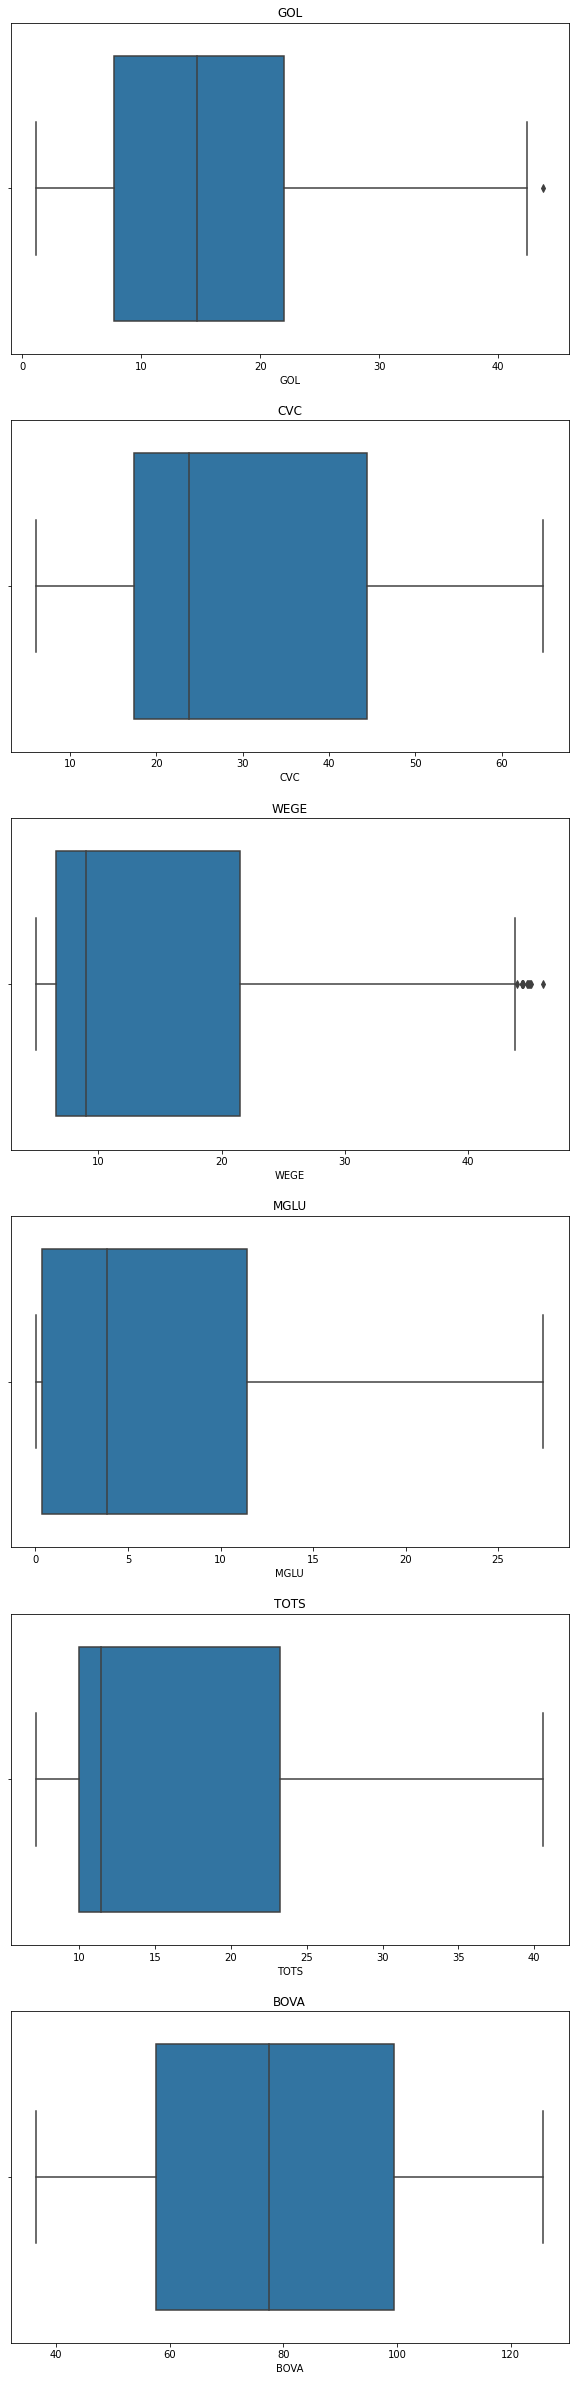

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

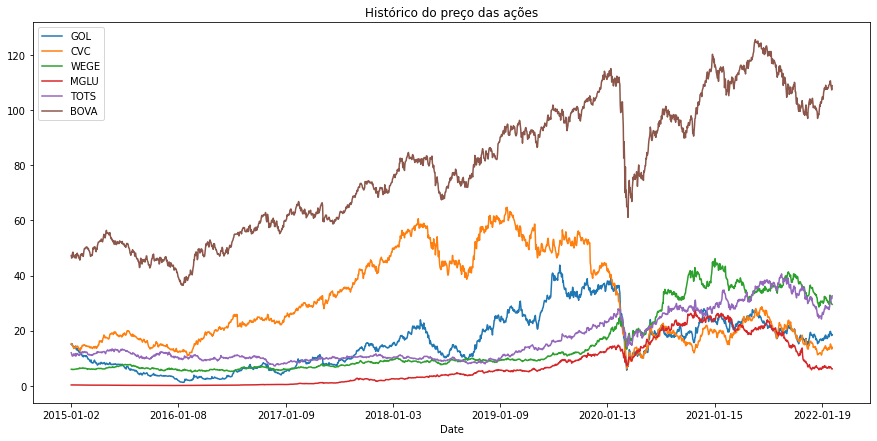

In [ ]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [ ]:
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1770,2022-02-16,19.709999,15.12,31.299999,6.820000,30.450001,110.769997
1771,2022-02-17,19.000000,14.68,30.650000,6.630000,32.220001,109.099998
1772,2022-02-18,18.930000,14.08,29.809999,6.360000,31.820000,108.510002
1773,2022-02-21,18.190001,13.27,29.650000,6.060000,31.549999,107.449997


In [ ]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [ ]:
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1770,2022-02-16,1.314877,0.994737,5.284416,29.294023,2.556524,2.343843
1771,2022-02-17,1.267512,0.965790,5.174676,28.477914,2.705130,2.308506
1772,2022-02-18,1.262842,0.926316,5.032858,27.318180,2.671547,2.296022
1773,2022-02-21,1.213476,0.873026,5.005845,26.029586,2.648878,2.273593


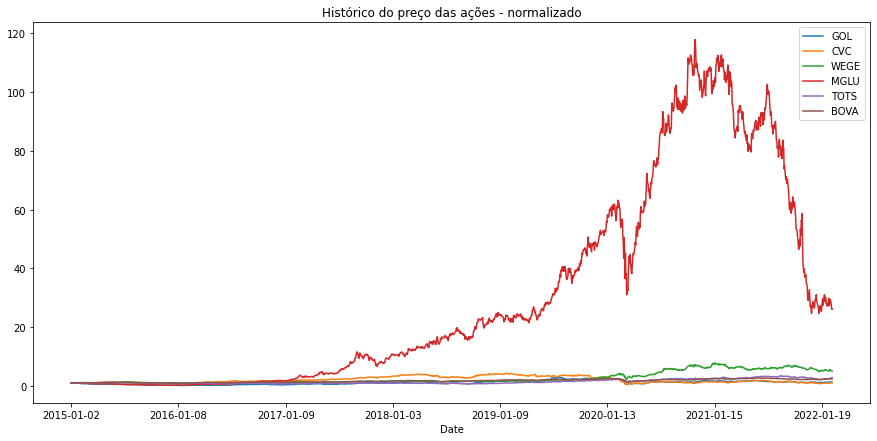

In [ ]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [ ]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()

## Exercício e solução

In [ ]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']

In [ ]:
acoes_ex_df = pd.DataFrame()
for acao in acoes_ex:
  #acoes_ex_df[acao] = data.DataReader(acao, data_source='yahoo', start = '2015-01-01')['Close']
  acoes_ex_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_ex_df

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR3.SA,BBAS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...
2022-02-16,15.080000,12.30,49.290001,36.270000,35.330002,110.769997
2022-02-17,14.850000,12.12,49.750000,36.099998,35.330002,109.099998
2022-02-18,14.770000,11.91,49.509998,35.869999,36.049999,108.510002


In [ ]:
acoes_ex_df.isnull().sum()

ABEV3.SA     0
ODPV3.SA     0
VIVT3.SA     0
PETR3.SA     0
BBAS3.SA     0
BOVA11.SA    0
dtype: int64

In [ ]:
acoes_ex_df.dropna(inplace=True)
acoes_ex_df.shape

(1775, 6)

In [ ]:
acoes_ex_df = acoes_ex_df.rename(columns={'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTOPREV', 'VIVT3.SA': 'VIVO',
                                          'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BBRASIL', 'BOVA11.SA': 'BOVA'})

In [ ]:
acoes_ex_df.to_csv('acoes_ex.csv')

In [ ]:
acoes_ex_df = pd.read_csv('acoes_ex.csv')
acoes_ex_df

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
1679,2021-10-11,15.240000,14.52,45.290001,29.770000,30.719999,107.750000
1680,2021-10-13,15.510000,14.63,46.000000,30.299999,30.760000,109.239998
1681,2021-10-14,15.490000,14.78,45.799999,30.250000,30.610001,108.970001
1682,2021-10-15,15.530000,15.05,46.169998,30.160000,31.580000,110.220001


In [ ]:
acoes_ex_df.describe()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000
mean,17.854169,13.369204,41.113961,20.085962,32.200469,77.665987
std,2.414584,2.184675,5.038426,7.508488,10.254396,23.622811
min,11.030000,9.000000,28.980000,5.910000,12.700000,36.450001
25%,16.629999,11.517500,37.197500,13.815000,24.822501,56.482501
50%,18.240000,13.175000,41.429998,19.645000,31.080000,75.500000
75%,19.192501,15.127500,44.275001,27.714999,37.567501,97.080000
max,24.270000,18.430000,56.740002,33.450001,55.180000,125.750000


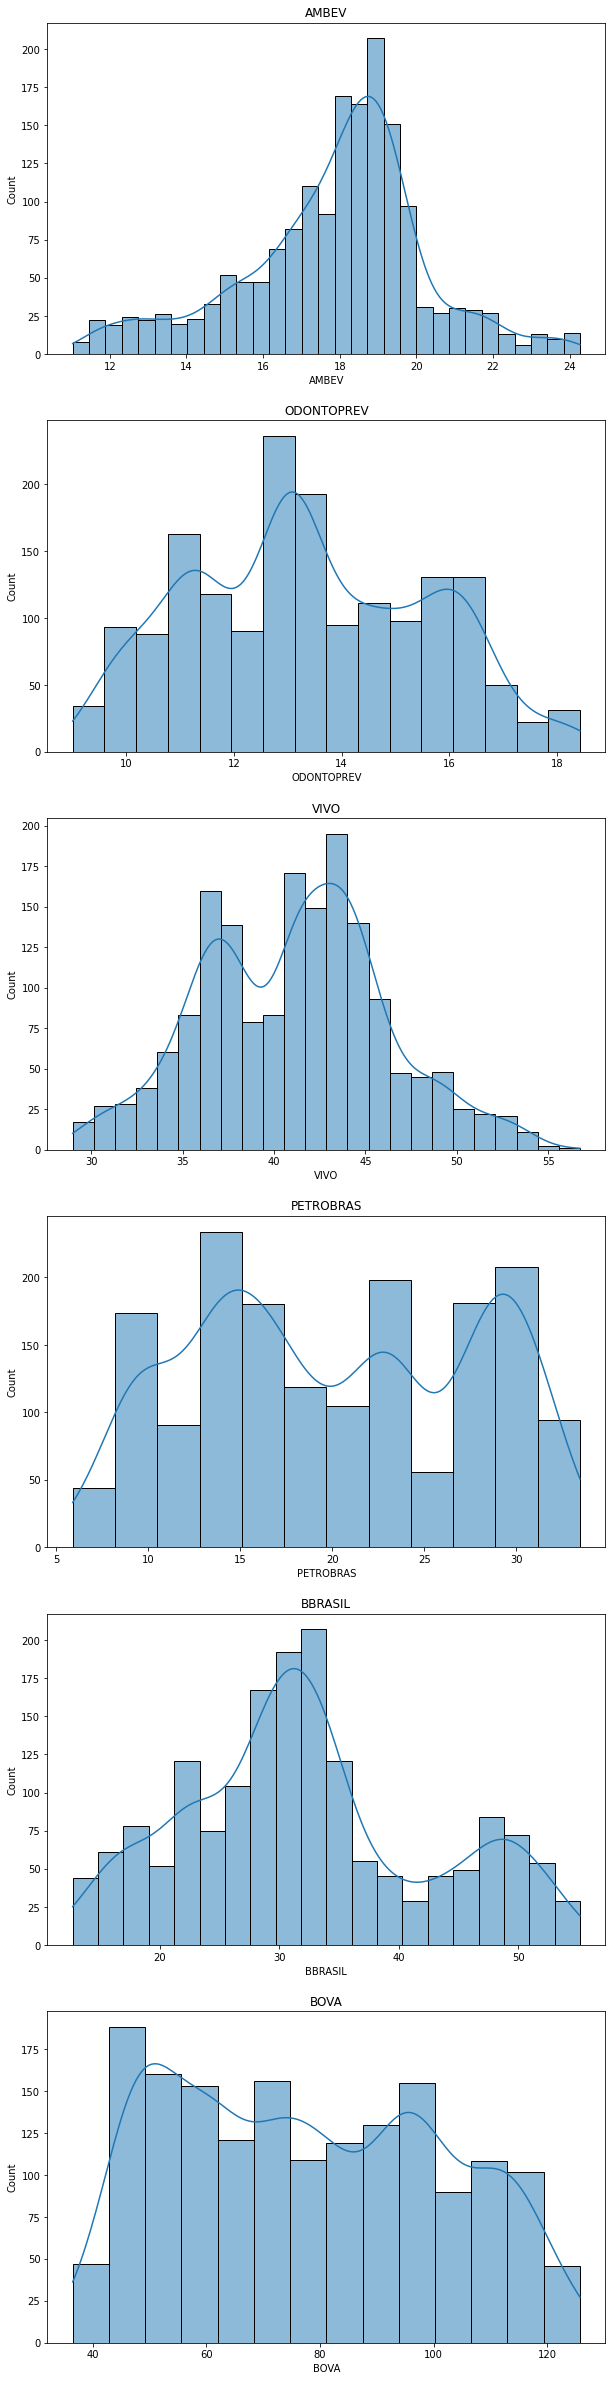

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_ex_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_ex_df[acoes_ex_df.columns[i]], kde = True)
  plt.title(acoes_ex_df.columns[i])

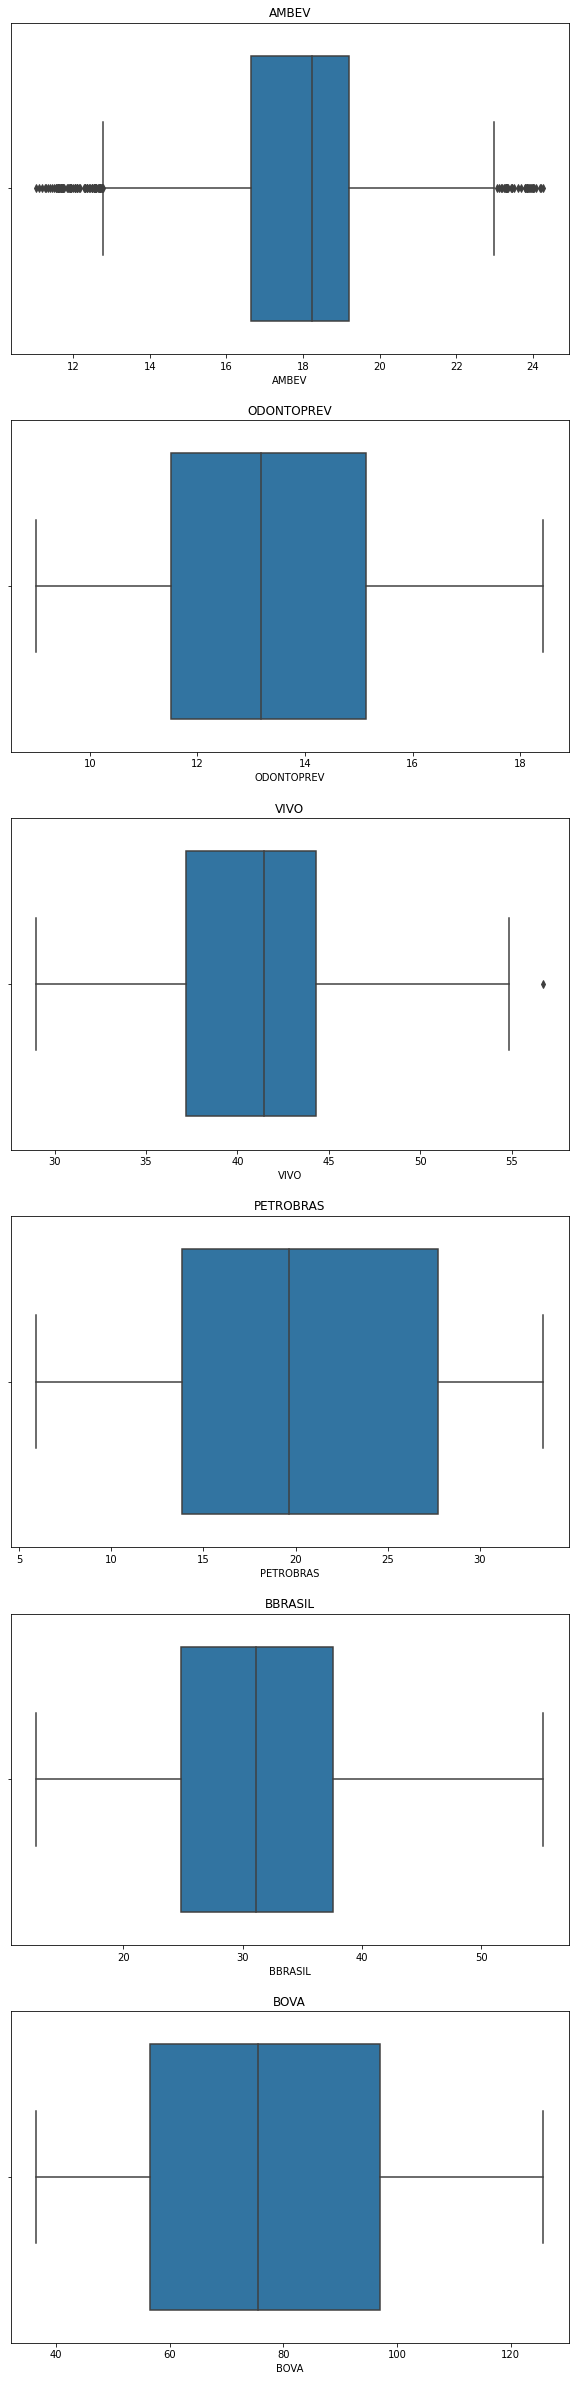

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_ex_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_ex_df[acoes_ex_df.columns[i]])
  plt.title(acoes_ex_df.columns[i])

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_ex_df.columns[1:]:
  figura.add_scatter(x = acoes_ex_df['Date'], y = acoes_ex_df[i], name = i)
figura.show()

In [ ]:
acoes_ex_df_normalizado = acoes_ex_df.copy()
for i in acoes_ex_df_normalizado.columns[1:]:
  acoes_ex_df_normalizado[i] = acoes_ex_df_normalizado[i] / acoes_ex_df_normalizado[i][0]

In [ ]:
acoes_ex_df_normalizado

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449
...,...,...,...,...,...,...,...
1679,2021-10-11,0.951311,1.549627,1.197515,3.307778,1.356291,2.279941
1680,2021-10-13,0.968165,1.561366,1.216288,3.366667,1.358057,2.311469
1681,2021-10-14,0.966916,1.577375,1.210999,3.361111,1.351435,2.305756
1682,2021-10-15,0.969413,1.606190,1.220783,3.351111,1.394261,2.332205


In [ ]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_ex_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_ex_df_normalizado['Date'], y = acoes_ex_df_normalizado[i], name = i)
figura.show()